# Loading libraries & dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler

In [2]:
original_data = pd.read_csv('_datasets\Social_Network_Ads.csv')
original_data.drop(columns = ['User ID'], inplace = True)
original_data

,Gender,Age,EstimatedSalary,Purchased
0,Male,19.0,19000.0,0
1,Male,35.0,20000.0,0
2,Female,26.0,43000.0,0
3,Female,27.0,57000.0,0
4,Male,19.0,76000.0,0
...,...,...,...,...
395,Female,46.0,41000.0,1
396,Male,51.0,23000.0,1
397,Female,50.0,20000.0,1
398,Male,36.0,33000.0,0


# Analysis of dataset

In [3]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           400 non-null    object 
 1   Age              400 non-null    float64
 2   EstimatedSalary  400 non-null    float64
 3   Purchased        400 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 12.6+ KB


In [4]:
original_data.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [5]:
original_data.duplicated().sum()

20

In [6]:
original_data.isna().sum()  

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

Data shape:
(400, 4)
Classes:
[0 1]
Class distribution:
Purchased
0    257
1    143
dtype: int64


<Axes: xlabel='Purchased', ylabel='count'>

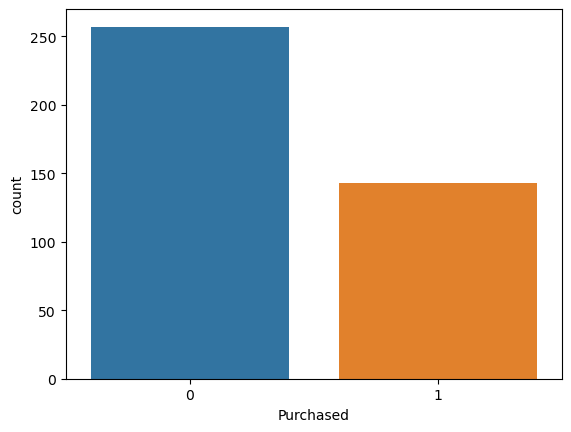

In [7]:
print('Data shape:')
print(original_data.shape)
print('Classes:')
print(original_data['Purchased'].unique())
print('Class distribution:')
print(original_data.groupby('Purchased').size())
sb.countplot(x = original_data['Purchased'], label = 'Count')

C:\Users\dexp\miniconda3\envs\env-tf\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


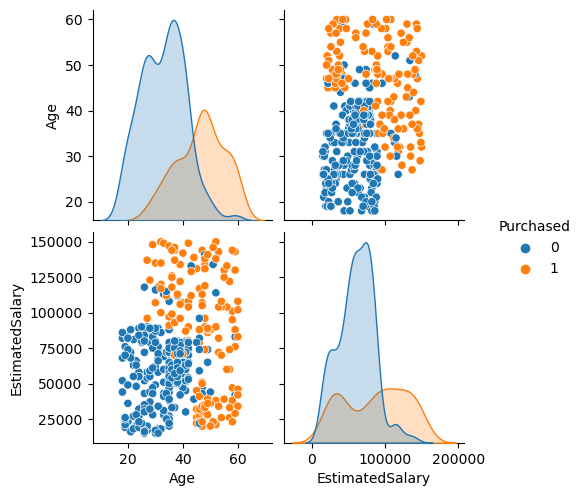

In [8]:
sb.pairplot(original_data, hue = 'Purchased')

<Axes: >

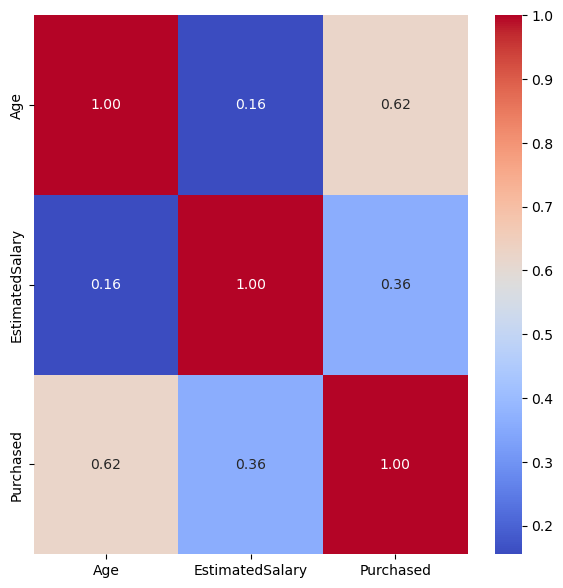

In [10]:
plt.figure(figsize = (7, 7))
sb.heatmap(original_data.drop(columns = ['Gender']).corr(), annot = True, cmap = 'coolwarm', fmt = '.2f')

# Preprocessing

In [11]:
work_data = pd.get_dummies(original_data)
work_data

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19.0,19000.0,0,False,True
1,35.0,20000.0,0,False,True
2,26.0,43000.0,0,True,False
3,27.0,57000.0,0,True,False
4,19.0,76000.0,0,False,True
...,...,...,...,...,...
395,46.0,41000.0,1,True,False
396,51.0,23000.0,1,False,True
397,50.0,20000.0,1,True,False
398,36.0,33000.0,0,False,True


In [12]:
gender_female_column = work_data['Gender_Female']
gender_male_column = work_data['Gender_Male']
purchased_column = work_data['Purchased']

work_data_for_scaling = work_data.drop(columns = ['Purchased', 'Gender_Female', 'Gender_Male'])

standard_scaler = StandardScaler()
standard_scaler.fit(work_data_for_scaling)
standardized_data_matrix = standard_scaler.transform(work_data_for_scaling)

standardized_data = pd.DataFrame(standardized_data_matrix, columns = ['Age', 'EstimatedSalary'])
standardized_data['Purchased'] = purchased_column
standardized_data['Gender_Female'] = gender_female_column
standardized_data['Gender_Male'] = gender_male_column

standardized_data

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,-1.781797,-1.490046,0,False,True
1,-0.253587,-1.460681,0,False,True
2,-1.113206,-0.785290,0,True,False
3,-1.017692,-0.374182,0,True,False
4,-1.781797,0.183751,0,False,True
...,...,...,...,...,...
395,0.797057,-0.844019,1,True,False
396,1.274623,-1.372587,1,False,True
397,1.179110,-1.460681,1,True,False
398,-0.158074,-1.078938,0,False,True


C:\Users\dexp\miniconda3\envs\env-tf\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


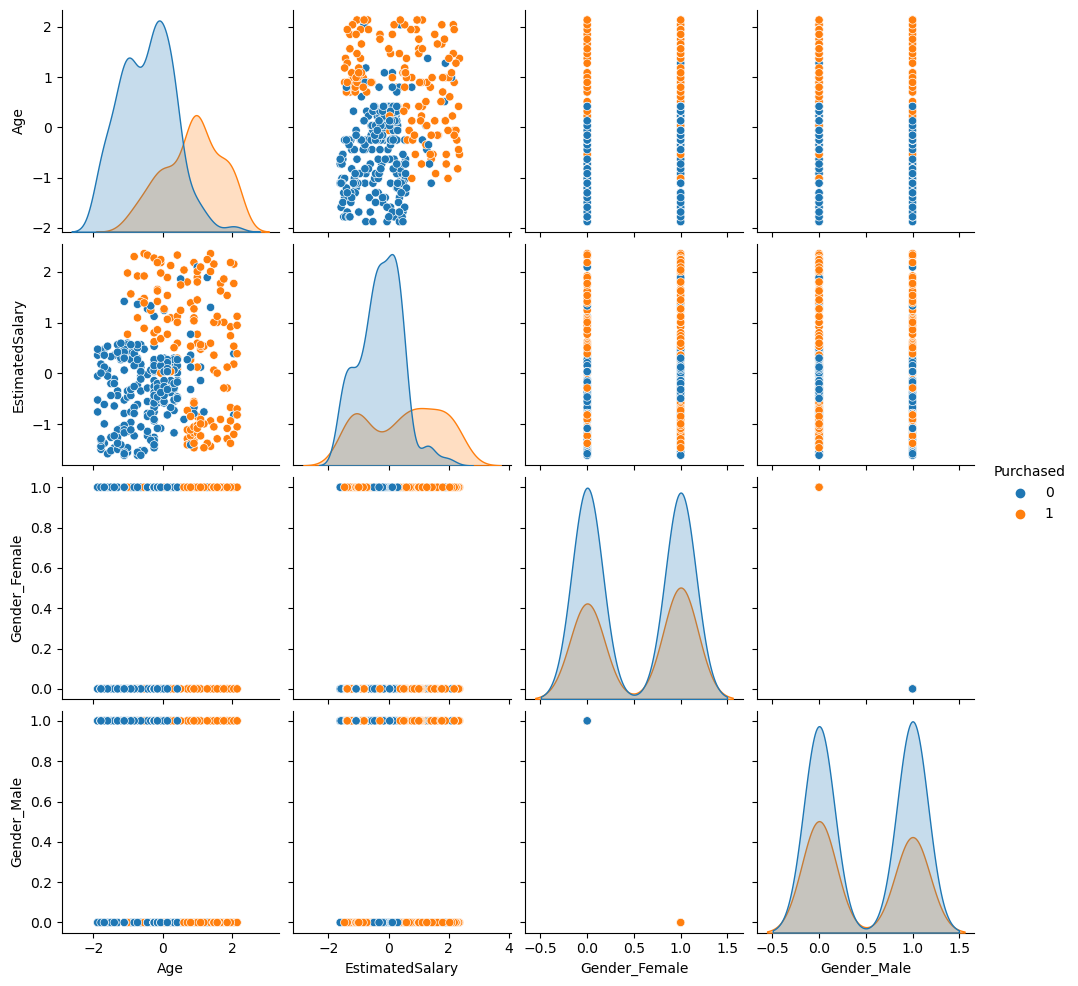

In [14]:
sb.pairplot(standardized_data, hue = 'Purchased')

<Axes: >

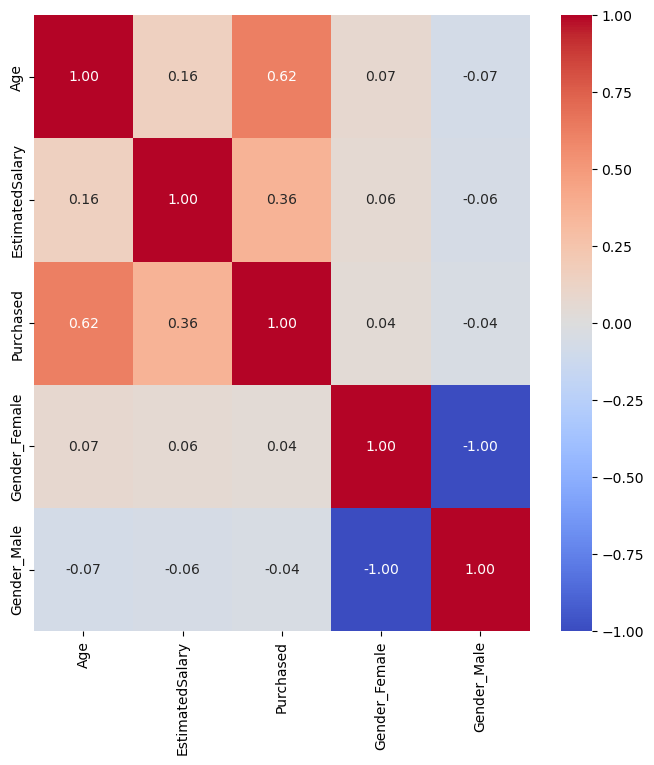

In [15]:
plt.figure(figsize = (8, 8))
sb.heatmap(standardized_data.corr(), annot = True, cmap = 'coolwarm', fmt = '.2f')

# Clusterisation

In [16]:
classless_data = standardized_data.drop(columns = ['Purchased'])
classless_data.Gender_Female = classless_data.Gender_Female.replace({True: 1, False: 0})
classless_data.Gender_Male = classless_data.Gender_Male.replace({True: 1, False: 0})
classless_data

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,-1.781797,-1.490046,0,1
1,-0.253587,-1.460681,0,1
2,-1.113206,-0.785290,1,0
3,-1.017692,-0.374182,1,0
4,-1.781797,0.183751,0,1
...,...,...,...,...
395,0.797057,-0.844019,1,0
396,1.274623,-1.372587,0,1
397,1.179110,-1.460681,1,0
398,-0.158074,-1.078938,0,1


In [17]:
from sklearn_som.som import SOM
from sklearn.metrics import classification_report

classless_data_numpyfied = classless_data.to_numpy()

#m, n - dimensions of rectangular matrix (their product should be equal to the amount of classes)
#dim - number of features
som = SOM(m = 2, n = 1, dim = 4, random_state = 42)
som.fit(classless_data_numpyfied)
predictions = som.predict(classless_data_numpyfied)
print(classification_report(standardized_data['Purchased'], predictions))

              precision    recall  f1-score   support

           0       0.74      0.64      0.68       257
           1       0.47      0.59      0.53       143

    accuracy                           0.62       400
   macro avg       0.61      0.61      0.60       400
weighted avg       0.64      0.62      0.63       400



In [18]:
clusterised_data = classless_data.copy()
clusterised_data['Purchased'] = predictions
clusterised_data

,Age,EstimatedSalary,Gender_Female,Gender_Male,Purchased
0,-1.781797,-1.490046,0,1,0
1,-0.253587,-1.460681,0,1,0
2,-1.113206,-0.785290,1,0,0
3,-1.017692,-0.374182,1,0,0
4,-1.781797,0.183751,0,1,1
...,...,...,...,...,...
395,0.797057,-0.844019,1,0,0
396,1.274623,-1.372587,0,1,0
397,1.179110,-1.460681,1,0,0
398,-0.158074,-1.078938,0,1,0


Class distribution:
Purchased
0    223
1    177
dtype: int64


<Axes: xlabel='Purchased', ylabel='count'>

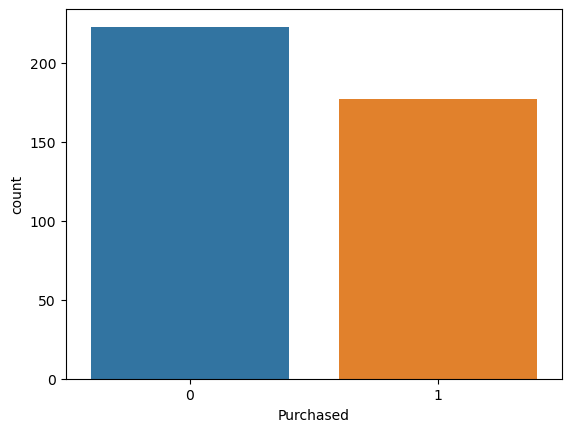

In [20]:
print('Class distribution:')
print(clusterised_data.groupby('Purchased').size())
sb.countplot(x = clusterised_data['Purchased'], label = 'Count')

C:\Users\dexp\miniconda3\envs\env-tf\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


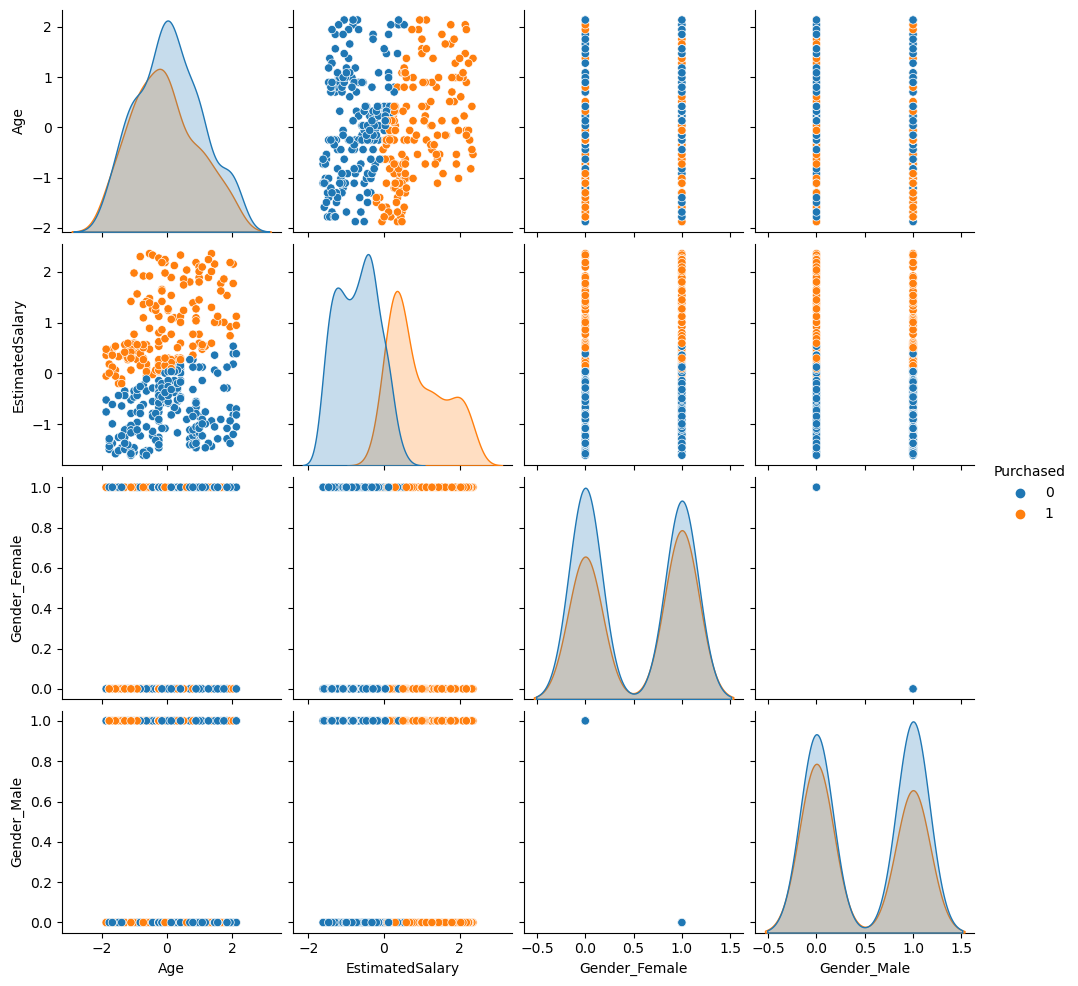

In [21]:
sb.pairplot(clusterised_data, hue = 'Purchased')

<Axes: >

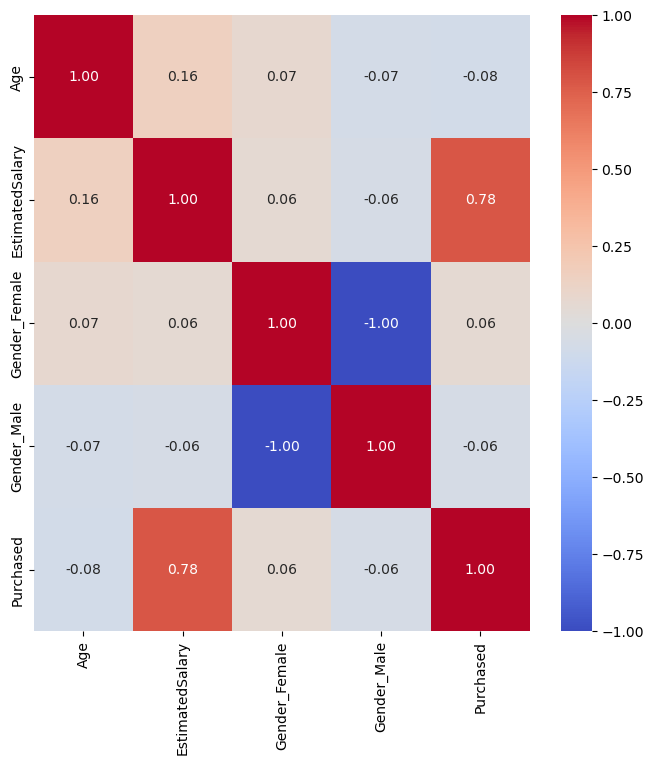

In [22]:
plt.figure(figsize = (8, 8))
sb.heatmap(clusterised_data.corr(), annot = True, cmap = 'coolwarm', fmt = '.2f')